# Legge di Boyle (linearizzata con intercetta nulla)

*Sulla base della lettura di un file CSV, calcola il coefficiente della retta di regressione nel modello con intercetta nulla e la relativa incertezza.
Visualizza i risultati in tre grafici: il primo comprendente i dati e la retta di regressione, il secondo l'iperbole che ne deriva e nel terzo sono riportati i residui con la relativa deviazione standard.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nome_file = input("Inserire il nome del file CSV: ")
file_in = open(nome_file, "r")
coppie_dati = np.loadtxt(file_in, delimiter = ",", comments = '#', usecols = (0,1))

Viene calcolato il parametro $a$ che definisce la proporzionalità tra pressione e volume.

In [3]:
n = len(coppie_dati)

nparrayX_Y = coppie_dati.transpose()
dati_y = nparrayX_Y[0]
dati_pressione = nparrayX_Y[1]
dati_x = 1/dati_pressione

file_in.close()

# formula (19) nel file regressione01.html
a = sum(dati_x*dati_y)/sum(dati_x**2)

Qui si calcolano i residui e le deviazioni standard, rispettivamente dei residui e di $a$.

In [4]:
previsioni_y = a*dati_x
residui = dati_y - previsioni_y

sigma = np.std(residui, ddof=1)
sigma_a = sigma*np.sqrt(1/sum(dati_x**2))

In [5]:
min_x = min(dati_x)
max_x = max(dati_x)
delta_x = (max_x-min_x)/15

min_pres = min(dati_pressione)
max_pres = max(dati_pressione)
delta_pres = (max_pres-min_pres)/15

Si costruiscono le rette che individuano la fascia di incertezza. 

In [6]:
x = np.linspace(min_x-delta_x, max_x+delta_x, 100)
y = a*x
y_sup = (a+sigma_a)*x 
y_inf = (a-sigma_a)*x

Qui vengono definite le corrispondenti iperboli

In [7]:
x_pres = np.linspace(min_pres-delta_pres, max_pres+delta_pres, 100)
y_pres = a/x_pres
y_pressup = (a+sigma_a)/x_pres 
y_presinf = (a-sigma_a)/x_pres 

Primo grafico: dispersione dei dati, retta di regressione e fascia di incertezza.

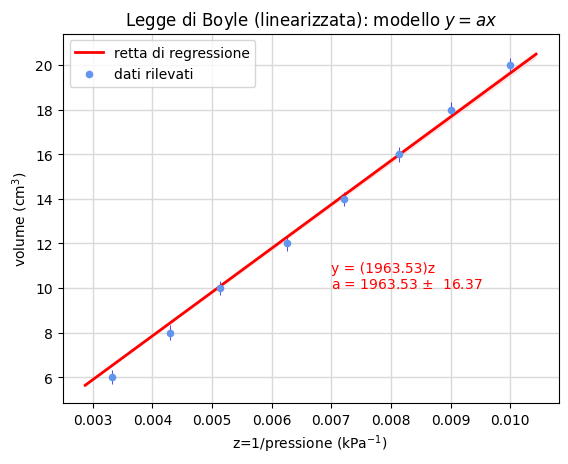

In [8]:
plt.grid(which = 'both', color = '.85', linestyle = '-', linewidth=1)
plt.vlines(dati_x, dati_y-sigma, dati_y+sigma, linewidth = .5, color = 'b')
plt.fill_between(x, y_inf, y_sup, alpha = .1, linewidth = 0, color='r')
plt.plot(x, y, color = 'red', linewidth = 2, label = 'retta di regressione')
plt.scatter(dati_x, dati_y, s = 20, c = 'cornflowerblue', zorder = 3, label = 'dati rilevati')
plt.title("Legge di Boyle (linearizzata): modello $y=ax$")
plt.xlabel('z=1/pressione (kPa$^{-1}$) ')
plt.ylabel('volume (cm$^3$)')
plt.text(0.007, 10, 'y = ({0:6.2f})z\na = {0:6.2f} $\pm$ {1:6.2f}'.format(a, sigma_a), c = 'r')
plt.legend()
plt.show()

Nei grafici successivi si utilizzano gli stessi valori per tracciare l'iperbole $V=\hat a/P$ e quelle che delimitano la fascia di incertezza.

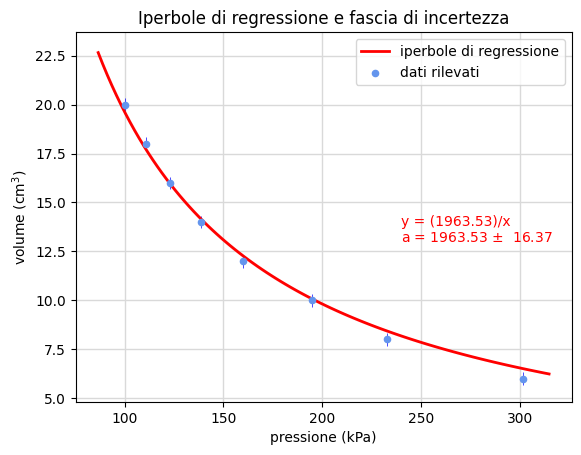

In [9]:
plt.grid(which = 'both', color = '.85', linestyle = '-', linewidth=1)
plt.vlines(dati_pressione, dati_y-sigma, dati_y+sigma, linewidth = .5, color = 'b')
plt.fill_between(x_pres, y_presinf, y_pressup, alpha = .1, linewidth = 0, color='r')
plt.plot(x_pres, y_pres, color = 'red', linewidth = 2, label = 'iperbole di regressione')
plt.scatter(dati_pressione, dati_y, s = 20, c = 'cornflowerblue', zorder = 3, label = 'dati rilevati')
plt.title("Iperbole di regressione e fascia di incertezza")
plt.xlabel('pressione (kPa)')
plt.ylabel('volume (cm$^3$)')
plt.text(240, 13, 'y = ({0:6.2f})/x\na = {0:6.2f} $\pm$ {1:6.2f}'.format(a, sigma_a), c = 'r')
plt.legend()
plt.show()

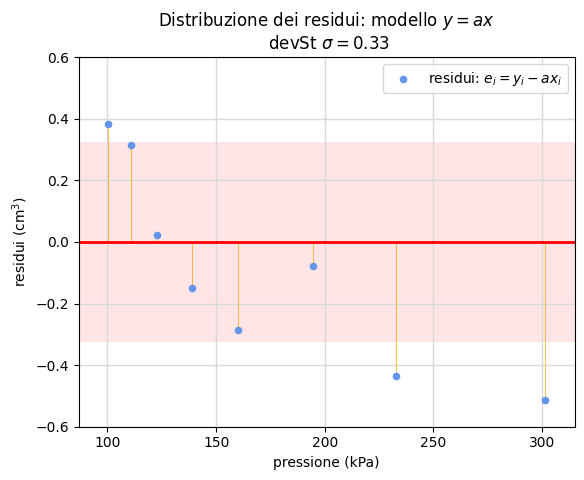

In [10]:
plt.grid(which = 'both', color = '.85', linestyle = '-', linewidth=1)
plt.xlim([min_pres-delta_pres, max_pres+delta_pres])
# la medesima scala del modello lineare completo
plt.ylim([-.6, .6])
plt.vlines(dati_pressione, np.zeros(n), residui, linewidth = .5, color = 'orange')
plt.fill_between(x_pres, -sigma, sigma, alpha =.1, linewidth = 0, color = 'r')
plt.plot(x_pres, np.zeros(100), color = 'red', linewidth = 2)
plt.scatter(dati_pressione, residui, s = 20, c = 'cornflowerblue', zorder = 3, label = 'residui: $e_i=y_i-ax_i$')
plt.title("Distribuzione dei residui: modello $y=ax$\n devSt $\sigma=$" + str(round(sigma,2)))
plt.xlabel("pressione (kPa)")
plt.ylabel("residui (cm$^3$)")
plt.legend()
plt.show()